In [60]:
!pip install category_encoders

In [61]:
import category_encoders as ce

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import pandas as pd

# load the dataset
df = pd.read_csv('/content/drive/MyDrive/DMKD/Project/03. Airline Passenger Satisfaction.csv')

#Check number of rows and columns in the dataset
print("The dataset has %d rows and %d columns." % df.shape)

The dataset has 129880 rows and 25 columns.


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      1298

In [65]:
df.head(20)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [66]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction    

In [67]:
missing_values = df[pd.isnull(df).any(axis=1)]

In [68]:
missing_values

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
213,213,49608,Female,Loyal Customer,38,Business travel,Eco,109,5,3,3,3,5,5,5,5,5,2,4,1,1,5,31,NaN,satisfied
1124,1124,73442,Male,Loyal Customer,53,Personal Travel,Eco,1012,3,2,3,4,4,3,4,4,4,4,4,3,3,4,38,NaN,neutral or dissatisfied
1529,1529,71178,Male,Loyal Customer,39,Business travel,Business,733,2,5,5,5,2,4,3,2,2,2,2,2,2,3,11,NaN,neutral or dissatisfied
2004,2004,72940,Female,disloyal Customer,26,Business travel,Business,1035,3,3,3,1,2,3,2,2,3,3,4,5,5,2,41,NaN,neutral or dissatisfied
2108,2108,116374,Female,Loyal Customer,24,Personal Travel,Eco,417,2,1,2,2,5,2,5,5,1,4,2,1,2,5,1,NaN,neutral or dissatisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127976,127976,21780,Male,Loyal Customer,45,Business travel,Eco,352,5,1,1,1,5,5,5,5,1,1,1,3,2,5,26,NaN,satisfied
128037,128037,64934,Female,Loyal Customer,29,Business travel,Business,3873,3,3,3,3,3,3,3,3,3,4,4,4,3,3,19,NaN,neutral or dissatisfied
128205,128205,125688,Male,disloyal Customer,38,Business travel,Business,759,3,3,3,1,4,3,4,4,3,3,5,5,4,4,0,NaN,satisfied
129032,129032,64706,Female,Loyal Customer,52,Business travel,Business,3659,5,5,5,5,2,4,5,5,5,5,5,3,5,3,0,NaN,satisfied


In [69]:
df2 = df.drop(columns=['Unnamed: 0' , 'id'] ,inplace=False ) 

In [70]:
df2.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,Female,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,Female,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [71]:
df2.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [72]:
df2["Gender"]=df2["Gender"].apply(lambda x: 0 if x=="Male" else 1)

In [73]:
df2.columns = df2.columns.str.replace(' ','_')

In [74]:
df2.head(10)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,1,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,0,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,1,Loyal Customer,52,Business travel,Business,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,1,Loyal Customer,41,Business travel,Business,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,0,disloyal Customer,20,Business travel,Eco,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [75]:
df2["Customer_Type"]= df2["Customer_Type"].apply(lambda x: 0 if x=="Loyal Customer" else 1)

In [76]:
df2["Type_of_Travel"]= df2["Type_of_Travel"].apply(lambda x: 0 if x=="Personal Travel" else 1)

In [77]:
df2["Class"]= df2["Class"].apply(lambda x: 0 if x=="Eco Plus" else (1 if x=="Business" else 2 ))

In [78]:
#df2["satisfaction"]= df2["satisfaction"].apply(lambda x: 0 if x=="neutral or dissatisfied" else 1)

In [79]:
df2.head(30)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,1,25,1,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,0,26,1,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,0,25,1,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,0,61,1,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,1,0,26,0,2,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,0,0,47,0,2,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,1,0,52,1,1,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,1,0,41,1,1,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,0,1,20,1,2,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# ------------Replapcing Nulls with Mean:-----------

In [80]:
#df2=df2.fillna(df2.mean())
df2['Arrival_Delay_in_Minutes'] = df2['Arrival_Delay_in_Minutes'].fillna(0, inplace=False)

In [81]:
df2.isnull().sum()

Gender                               0
Customer_Type                        0
Age                                  0
Type_of_Travel                       0
Class                                0
Flight_Distance                      0
Inflight_wifi_service                0
Departure/Arrival_time_convenient    0
Ease_of_Online_booking               0
Gate_location                        0
Food_and_drink                       0
Online_boarding                      0
Seat_comfort                         0
Inflight_entertainment               0
On-board_service                     0
Leg_room_service                     0
Baggage_handling                     0
Checkin_service                      0
Inflight_service                     0
Cleanliness                          0
Departure_Delay_in_Minutes           0
Arrival_Delay_in_Minutes             0
satisfaction                         0
dtype: int64

In [82]:
df2.iloc[109]

Gender                                                     1
Customer_Type                                              0
Age                                                       26
Type_of_Travel                                             0
Class                                                      2
Flight_Distance                                         1144
Inflight_wifi_service                                      3
Departure/Arrival_time_convenient                          5
Ease_of_Online_booking                                     2
Gate_location                                              2
Food_and_drink                                             4
Online_boarding                                            2
Seat_comfort                                               4
Inflight_entertainment                                     4
On-board_service                                           5
Leg_room_service                                           4
Baggage_handling        

In [83]:
missing_values = df2[pd.isnull(df2).any(axis=1)]

In [84]:
missing_values

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction


In [85]:
df2.describe()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,0.507384,0.183092,39.427957,0.690584,1.376486,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.045465
std,0.499947,0.386743,15.119360,0.462255,0.616170,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.416353
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,1.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,1.000000,0.000000,40.000000,1.000000,1.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,2.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [86]:
#df2['Age'] = (df2['Age']-df2['Age'].min()) / (df2['Age'].max()-df2['Age'].min())

In [87]:
#df2['Flight_Distance'] = (df2['Flight_Distance']-df2['Flight_Distance'].min()) / (df2['Flight_Distance'].max()-df2['Flight_Distance'].min())

In [88]:
#df2['Inflight_wifi_service'] = (df2['Inflight_wifi_service']-df2['Inflight_wifi_service'].min()) / (df2['Inflight_wifi_service'].max()-df2['Inflight_wifi_service'].min())

In [89]:
#df2['Departure/Arrival_time_convenient'] = (df2['Departure/Arrival_time_convenient']-df2['Departure/Arrival_time_convenient'].min()) / (df2['Departure/Arrival_time_convenient'].max()-df2['Departure/Arrival_time_convenient'].min())

In [90]:
#df2['Ease_of_Online_booking'] = (df2['Ease_of_Online_booking']-df2['Ease_of_Online_booking'].min()) / (df2['Ease_of_Online_booking'].max()-df2['Ease_of_Online_booking'].min())

In [91]:
#df2['Gate_location'] = (df2['Gate_location']-df2['Gate_location'].min()) / (df2['Gate_location'].max()-df2['Gate_location'].min())

In [92]:
#df2['Food_and_drink'] = (df2['Food_and_drink']-df2['Food_and_drink'].min()) / (df2['Food_and_drink'].max()-df2['Food_and_drink'].min())

In [93]:
#df2['Online_boarding'] = (df2['Online_boarding']-df2['Online_boarding'].min()) / (df2['Online_boarding'].max()-df2['Online_boarding'].min())

In [94]:
#df2['Seat_comfort'] = (df2['Seat_comfort']-df2['Seat_comfort'].min()) / (df2['Seat_comfort'].max()-df2['Seat_comfort'].min())

In [95]:
#df2['Inflight_entertainment'] = (df2['Inflight_entertainment']-df2['Inflight_entertainment'].min()) / (df2['Inflight_entertainment'].max()-df2['Inflight_entertainment'].min())

In [96]:
#df2['On-board_service'] = (df2['On-board_service']-df2['On-board_service'].min()) / (df2['On-board_service'].max()-df2['On-board_service'].min())

In [97]:
#df2['Leg_room_service'] = (df2['Leg_room_service']-df2['Leg_room_service'].min()) / (df2['Leg_room_service'].max()-df2['Leg_room_service'].min())

In [98]:
#df2['Baggage_handling'] = (df2['Baggage_handling']-df2['Baggage_handling'].min()) / (df2['Baggage_handling'].max()-df2['Baggage_handling'].min())

In [99]:
#df2['Checkin_service'] = (df2['Checkin_service']-df2['Checkin_service'].min()) / (df2['Checkin_service'].max()-df2['Checkin_service'].min())

In [100]:
#df2['Inflight_service'] = (df2['Inflight_service']-df2['Inflight_service'].min()) / (df2['Inflight_service'].max()-df2['Inflight_service'].min())

In [101]:
#df2['Cleanliness'] = (df2['Cleanliness']-df2['Cleanliness'].min()) / (df2['Cleanliness'].max()-df2['Cleanliness'].min())

In [102]:
#df2['Departure_Delay_in_Minutes'] = (df2['Departure_Delay_in_Minutes']-df2['Departure_Delay_in_Minutes'].min()) / (df2['Departure_Delay_in_Minutes'].max()-df2['Departure_Delay_in_Minutes'].min())

In [103]:
#df2['Arrival_Delay_in_Minutes'] = (df2['Arrival_Delay_in_Minutes']-df2['Arrival_Delay_in_Minutes'].min()) / (df2['Arrival_Delay_in_Minutes'].max()-df2['Arrival_Delay_in_Minutes'].min())

In [104]:
df2.head(10)

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,0,13,0,0,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,1,25,1,1,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,0,26,1,1,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,0,25,1,1,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,0,61,1,1,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
5,1,0,26,0,2,1180,3,4,2,1,1,2,1,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,0,0,47,0,2,1276,2,4,2,3,2,2,2,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,1,0,52,1,1,2035,4,3,4,4,5,5,5,5,5,5,5,4,5,4,4,0.0,satisfied
8,1,0,41,1,1,853,1,2,2,2,4,3,3,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,0,1,20,1,2,1061,3,3,3,4,2,3,3,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


# Preparing dataset to be fed into Model

In [105]:
X = df2.drop(['satisfaction'], axis=1)

y = df2['satisfaction']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [107]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(87019, 22)
(87019,)
(42861, 22)
(42861,)


In [108]:
X_train.head()

,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online_booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
921,0,0,29,0,2,1192,1,5,1,2,3,1,3,3,4,3,4,5,5,3,0,0.0
19082,1,0,50,1,2,1023,3,1,1,1,5,3,4,2,2,3,2,1,2,1,0,0.0
73614,0,0,47,1,1,238,4,4,4,4,3,5,5,5,5,5,5,5,5,4,0,1.0
53145,0,0,28,1,1,3314,2,2,2,2,5,5,5,5,5,5,5,3,5,5,0,0.0
57327,1,0,51,1,0,622,2,1,5,1,4,3,4,2,2,2,2,2,2,1,0,0.0


# Decision Tree - CART

## **Measures for selecting the Best Split**

The measures developed for selecting the best split are often based on the degree of impurity of the child nodes. The smaller the degree of impurity, the more skewed the class distribution. For example, a node with class distribution (0,1) has zero impurity wheres a node with uniform class distribution has the highest impurity. Examples of impurity measures include:
   
* Entropy($t$) = $-\sum_{i=0}^{c-1}{p(i|t)\log_{2}p(i|t)}$

* Gini($t$) = $1-\sum_{i=0}^{c-1}{[p(i|t)]^2}$

* Classification Error($t$) = $1-\max_{i}[p(i|t)]$

where, $c$ is the number of classes and $0\log_{2}0=0$ in entropy calculations.

In [109]:
# Find more about scikit-learn's implementation of decision trees here - https://scikit-learn.org/stable/modules/tree.html

from sklearn.tree import DecisionTreeClassifier

In [110]:
# setting maximum depth of the decision tree to be level 7 with randomly chosen samples in the training set
clf_gini = DecisionTreeClassifier(max_depth=10, random_state=42)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [111]:
# Getting some predictions from the testing set
y_pred_gini = clf_gini.predict(X_test)

In [112]:
# Finding the testing accuracy of the model
from sklearn.metrics import accuracy_score

print('Test accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Test accuracy score with criterion gini index: 0.9423


In [113]:
# Finding the training accuracy of the model
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'satisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

In [114]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9500


In [115]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9500
Test set score: 0.9423


[Text(0.41411637931034484, 0.9545454545454546, 'X[11] <= 3.5\ngini = 0.491\nsamples = 87019\nvalue = [49256, 37763]'),
 Text(0.17169540229885058, 0.8636363636363636, 'X[6] <= 0.5\ngini = 0.253\nsamples = 43803\nvalue = [37294, 6509]'),
 Text(0.10395114942528735, 0.7727272727272727, 'X[19] <= 0.5\ngini = 0.009\nsamples = 1541\nvalue = [7, 1534]'),
 Text(0.10165229885057471, 0.6818181818181818, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.10625, 0.6818181818181818, 'gini = 0.0\nsamples = 1534\nvalue = [0, 1534]'),
 Text(0.2394396551724138, 0.7727272727272727, 'X[6] <= 3.5\ngini = 0.208\nsamples = 42262\nvalue = [37287, 4975]'),
 Text(0.11084770114942528, 0.6818181818181818, 'X[4] <= 1.5\ngini = 0.12\nsamples = 38360\nvalue = [35910, 2450]'),
 Text(0.05890804597701149, 0.5909090909090909, 'X[13] <= 3.5\ngini = 0.248\nsamples = 14364\nvalue = [12276, 2088]'),
 Text(0.03908045977011494, 0.5, 'X[19] <= 4.5\ngini = 0.118\nsamples = 10077\nvalue = [9441, 636]'),
 Text(0.0298850574712643

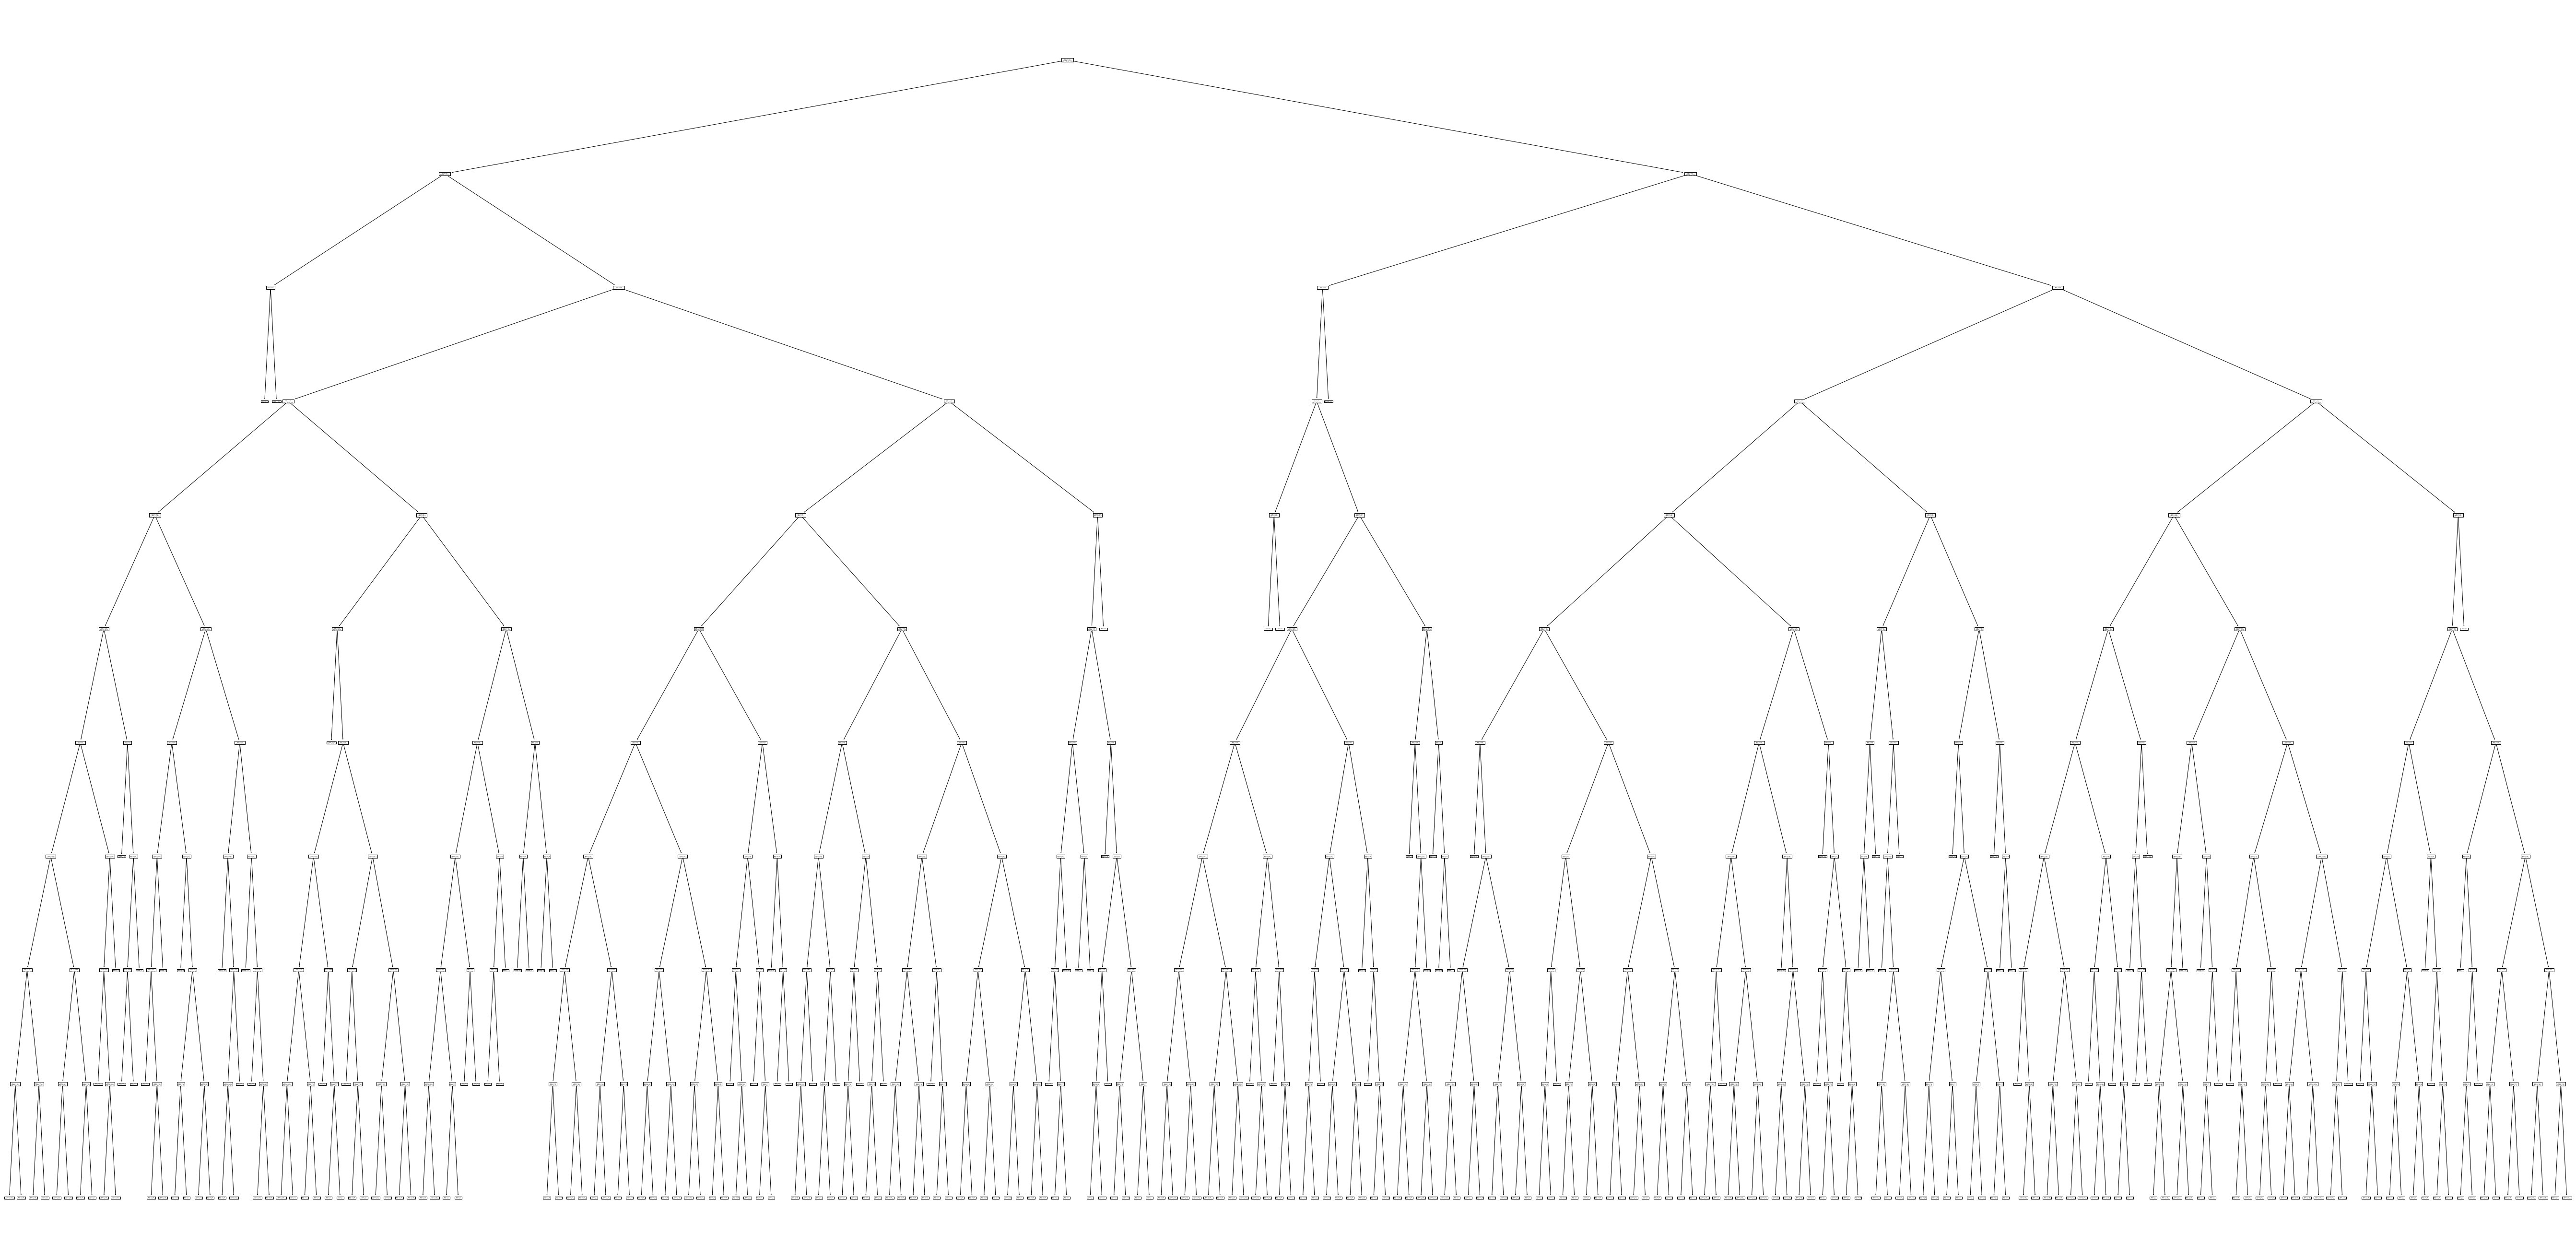

In [116]:
# plotting the splits
import matplotlib.pyplot as plt

plt.figure(figsize=(96,48))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

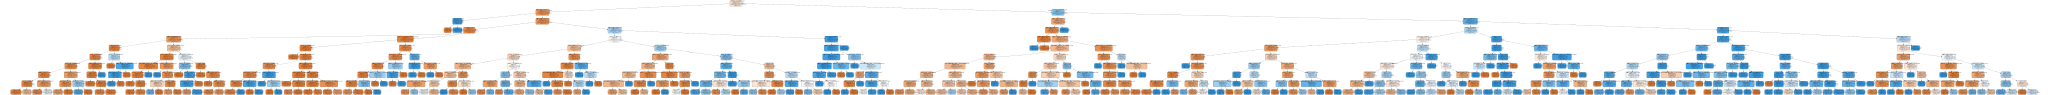

In [119]:
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=str(y_train),  
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

# Evaluating the Model - CART

# Confusion Matrix

# Calculating a Confusion Matrix

In [120]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_gini)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[23319   877]
 [ 1598 17067]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


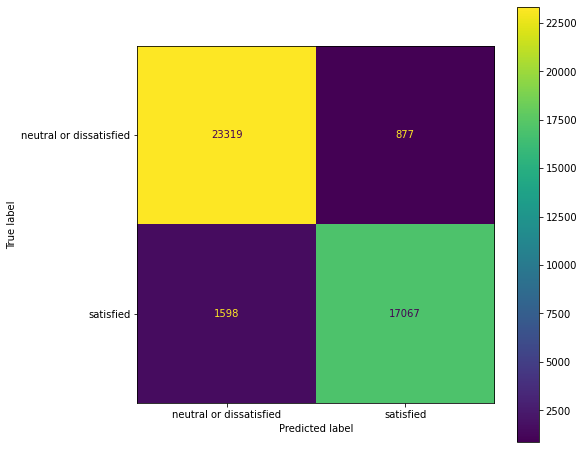

In [121]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(clf_gini, X_test, y_test, values_format='.0f', ax=ax)  

plt.savefig('/content/drive/MyDrive/CSI 382 - Datasets/cart_confusion_matrix.png')

# Support and Confidence

In [122]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     24196
              satisfied       0.95      0.91      0.93     18665

               accuracy                           0.94     42861
              macro avg       0.94      0.94      0.94     42861
           weighted avg       0.94      0.94      0.94     42861



# Decision Tree - C4.5

In [139]:
# setting maximum depth of the decision tree to be level 3 with randomly chosen samples in the training set
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

In [141]:
# Getting some predictions from the testing set
y_pred_en = clf_en.predict(X_test)

In [142]:
# Getting some predictions from the training set
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array(['neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       ..., 'satisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

In [143]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.9514


In [144]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.9514
Test set score: 0.9441


[Text(0.3994462025316456, 0.9545454545454546, 'X[11] <= 3.5\nentropy = 0.987\nsamples = 87019\nvalue = [49256, 37763]'),
 Text(0.1451740506329114, 0.8636363636363636, 'X[6] <= 0.5\nentropy = 0.606\nsamples = 43803\nvalue = [37294, 6509]'),
 Text(0.08132911392405064, 0.7727272727272727, 'X[19] <= 0.5\nentropy = 0.042\nsamples = 1541\nvalue = [7, 1534]'),
 Text(0.07879746835443038, 0.6818181818181818, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.08386075949367089, 0.6818181818181818, 'entropy = 0.0\nsamples = 1534\nvalue = [0, 1534]'),
 Text(0.20901898734177216, 0.7727272727272727, 'X[6] <= 3.5\nentropy = 0.523\nsamples = 42262\nvalue = [37287, 4975]'),
 Text(0.0889240506329114, 0.6818181818181818, 'X[3] <= 0.5\nentropy = 0.343\nsamples = 38360\nvalue = [35910, 2450]'),
 Text(0.08639240506329114, 0.5909090909090909, 'entropy = 0.0\nsamples = 16814\nvalue = [16814, 0]'),
 Text(0.09145569620253165, 0.5909090909090909, 'X[1] <= 0.5\nentropy = 0.511\nsamples = 21546\nvalue = [19096

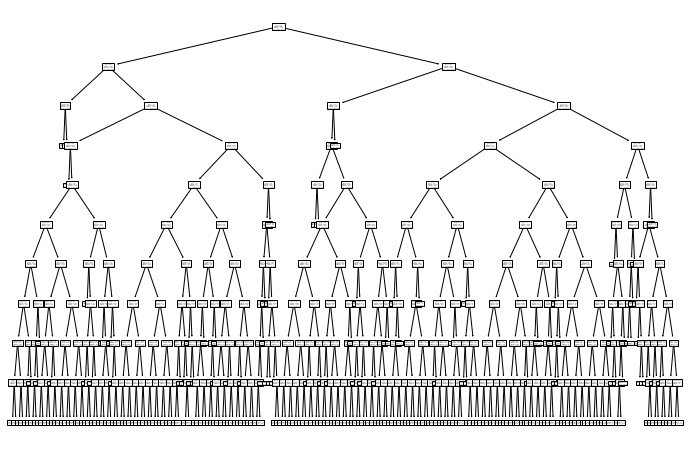

In [145]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

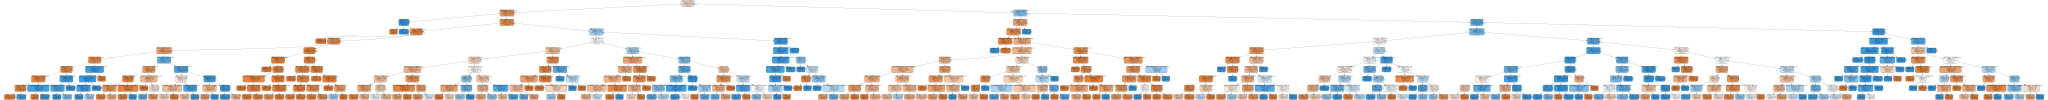

In [146]:
import graphviz 
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=str(y_train),  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

In [147]:
# Save the figure for future reference
graph.render(filename='C4.5.dot',directory='/content/drive/MyDrive/CSI 382 - Datasets/')

'/content/drive/MyDrive/CSI 382 - Datasets/C4.5.dot.pdf'

# Evaluating the model - C4.5

In [148]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[23305   891]
 [ 1504 17161]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


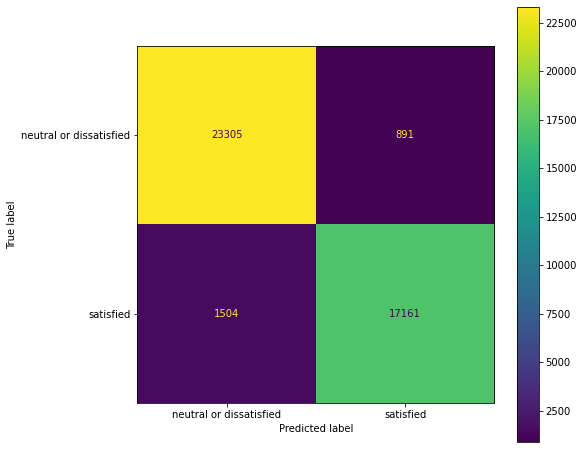

In [149]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

fig, ax = plt.subplots(figsize=(8, 8))

plot_confusion_matrix(clf_en, X_test, y_test, values_format='.0f', ax=ax)  

plt.savefig('/content/drive/MyDrive/CSI 382 - Datasets/c4.5_confusion_matrix.png')

# SUPPORT AND CONFIDENCE

In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

                         precision    recall  f1-score   support

neutral or dissatisfied       0.94      0.96      0.95     24196
              satisfied       0.95      0.92      0.93     18665

               accuracy                           0.94     42861
              macro avg       0.95      0.94      0.94     42861
           weighted avg       0.94      0.94      0.94     42861

